##  Homework 3 - Problem 5 : Bernoulli mixtures for mnist

### Student: Dimitrios Tanoglidis

First import some packages

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Import the MNIST dataset

I downloaded the MNIST data set, which is actually consisted  out of a training set ($\sim 60000$ images) and a test set ($\sim 10000$ images). 



In [2]:
data_train = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_images.npy"))
data_test = np.float64(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_images.npy"))
labels_train = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/train_labels.npy"))
labels_test = np.float32(np.load("/Users/Dimitris/Desktop/Machine_Learning/HW2/test_labels.npy"))


# Print their shapes to see
print(np.shape(data_train));print(np.shape(labels_train))
# Print their shapes to see
print(np.shape(data_test));print(np.shape(labels_test))

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


### Part 1: Warm-up - case M = 1

As a warm-up, I will first consider the case with $M = 1$, where there is no need to use the EM algorithm.

The training set is consisted of $60000$ data vectors of size 784; each one can be rshaped as a $28 \times 28$ matrix, representing a handwritten digit. 

The total likelihood for one data point is:

\begin{equation}
L(p) = \prod_{j=1}^{784} p_j^{x_j}(1 - p_j)^{(1-x_j)}
\end{equation}

The ML estimator of each one of the 784 parameters $p_j$, if we assume that we have $n$ observations is (from problem 5):

\begin{equation}
\boxed{
\hat{p}_j = \frac{1}{n} \sum_{i=1}^{n} x_{ij}, \quad j=1,\dots,784} 
\end{equation}

Now, we have ten differenct classes (ten different digits). 

For $\mathbf{each}$ class:

-  Calculate a vector (of length $784$) of the parameter estimates $\hat{p}_j$.

-  Reshape  the parameter vector as an $28 \times 28$ array and plot as an image.

After having the parameter vectors for the ten classes, for each data point from the test set, calculate the (log) likelihood $L(p)$ to belong in any of the ten classes.

- Assign the data point to the class that has the maximum likelihood (here we assume equal prior for all classes).


In [3]:
# Binarize data - set anything that is larger than zero equal to one
data_train[data_train>0.0] = 1.0
data_test[data_test>0.0] = 1.0

# Initialize a matrix that contains the parameters p_j 
# For each of the classes 0, 1, ...., 9

p_params = np.zeros([10,784])

Let's populate the vectors now...

In [4]:
for i in range(10):
    # Work for each one of the classes 0, 1, ..., 9
    i_fl = float(i)
    
    
    for j in range(784):
        data_j = data_train[:,j]
        #Select those data points belonging to the i-th class
        i_sel = (labels_train==i_fl)[:,0]
        data_ith_class = data_j[i_sel]
        # Calculate the mean - that is parameter p_j
        p_params[i,j] = np.mean(data_ith_class)

Let's plot the vectors and see the images

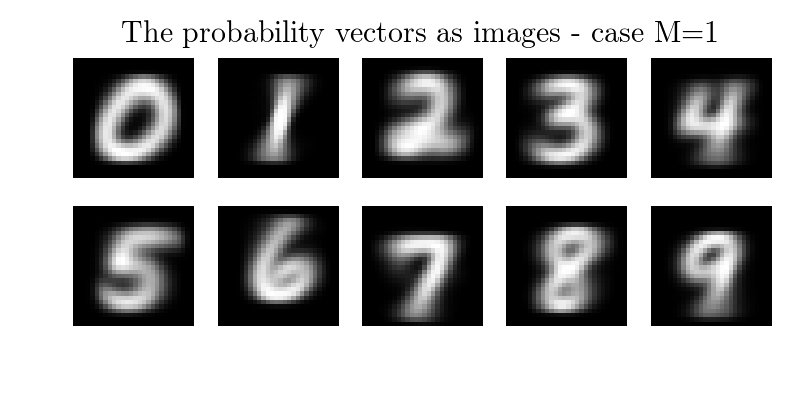

In [5]:
nrows = 2
ncols = 5

plt.figure(figsize=(ncols*0.9, nrows*0.9))

for i in xrange(nrows*ncols):
    if (i==3):
        plt.title("The probability vectors as images - case M=1")
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(p_params[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

We see that these probability vectors are somehow the  means of all data points.

Let's move on now to the classification part.

In [6]:
# Function that, for a data vector x, calculates the likelihood of each class and assigns
# it to the class with the maximum likelihood

def ML_return(x):
    """
    Returns the class with the maximum likelihood
    
    Input: Vector x
    Output : Class (0-9)
    """
    
    # Initilize the log-likelihoods of the ten categories
    Like = np.zeros(10)
    
    for i in range(10):
        log_p = np.log(p_params[i]+1e-30)
        log_p_1 = np.log(1 - p_params[i])
        
        Like[i] = np.sum(x*log_p + (1.0-x)*log_p_1)
        
    #Calculate maxlimum likelihood
    ML = np.max(Like)
    
    # Class - > where is the ML
    class_is = float(np.where(Like==ML)[0])
    
    return class_is
        

Let's predict the labels of the training set now.

In [7]:
Labels_predict = np.zeros(10000)

for i in range(10000):
    Labels_predict[i] = ML_return(data_test[i])

Let's plot some digits together with their predictions...

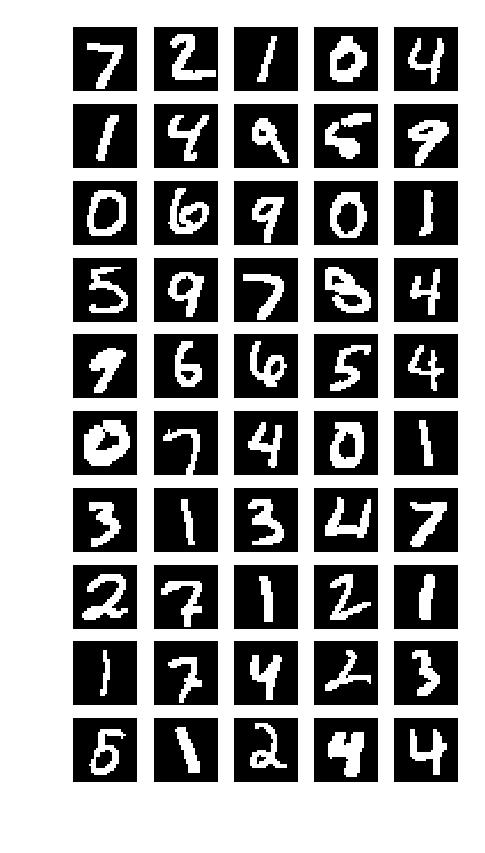

In [8]:
# Eigenvectors are the columnts of the matrix
data_test_plot = (data_test)[0:50,:]
labels_pred = Labels_predict[0:50]
nrows = 10
ncols = 5

plt.figure(figsize=(ncols*0.5, nrows*0.5))

for i in xrange(nrows*ncols):
    
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(data_test_plot[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

In [9]:
print(labels_pred)

[7. 2. 1. 0. 4. 1. 4. 9. 4. 9. 0. 6. 9. 0. 1. 3. 9. 7. 3. 4. 9. 6. 4. 5.
 4. 0. 7. 4. 0. 1. 3. 1. 3. 0. 7. 2. 7. 1. 3. 1. 1. 7. 4. 2. 3. 5. 3. 2.
 9. 4.]


We see that some predictions are correct, while some else not. We can use some metrics from scikit learn to check.

In [10]:
from sklearn.metrics import accuracy_score

# Let's print the accuracy score
print(accuracy_score(labels_test[:,0],Labels_predict))

0.8419


We see that with this simple classification we have $\sim 84 \%$ accuracy. Not bad, but let's see if we can improve that score when adding more clusters (cases with M=3,5).

### Part 2: Case M=3

Here I will use the EM algorithm since we have a mixture of Bernoullis.

After calculating the responsibilities $w_{mi}$, we update the mixtures $\hat{\pi}_m$ and the parameters $\hat{p}_{j,m}$ using:

\begin{equation}
\hat{\pi}_m^{new} = \frac{1}{n} \sum_{i=1}^n w_{ki} 
\end{equation}

\begin{equation}
\hat{p}_{j,m}^{new} = \frac{\sum_{i=1}^n w_{mi} x_{ij}}{\sum_{i=1}^n w_{im}}
\end{equation}

Note that if we define a matrix $A = w \times X$ then the above can be written:

\begin{equation}
\hat{p}_{j,m}^{new} = \frac{A_{mj}}{\sum_{i=1}^n w_{im}}
\end{equation}

In [27]:
# Initialize a matrix that contains the parameters p_m,j 
# For each of the classes 0, 1, ...., 9 and M = 3
p_params_M3 = np.zeros([30,784])

In [28]:
# Define a function that calculates the responsibilities w_mi
# Also return log - denominator

def w_mi_calc(p_j_par, gr_p_s, X):
    """
    Inputs:
    p_j_par: 3 x 84
    gr_p_s: 3 params
    X: data matrix n_input x 784
    
    returns: 3 x n matrix with the responsibilities
    """
    n = np.shape(X)[0]
    ell = np.zeros([3,n]) 
    w_mi = np.zeros([3,n])
    denom_i = np.zeros(n)
    for m in range(3):
        p_j_m = p_j_par[m]
        gr_p_m = gr_p_s[m]
        
        
        # Take the logs of the p_jm and gr_p
        log_gr_p_m = np.log(gr_p_m+1e-30)
        log_p_m = np.log(p_j_m+1e-30)
        log_p_1_m = np.log(1.0 - p_j_m)
        
        for i in range(n):
            x_vec = X[i]
            
            ell[m,i] = log_gr_p_m + np.sum(x_vec*log_p_m +(1.0 - x_vec)*log_p_1_m)
       
    
    for m in range(3):
        for i in range(n):
            L = np.max(ell[m,i])
            
            w_mi[m,i] = np.exp(ell[m,i] - L)/np.sum(np.exp(ell[:,i]-L))
            denom_i[i] = np.sum(np.exp(ell[:,i]))
    
    Log_L = np.sum(np.log(denom_i))
    return w_mi, Log_L    
   

In [29]:
for i in range(10): #In the range of the ten number classes
    # Work for each one of the classes 0, 1, ..., 9
    i_fl = float(i)
    #Select the data corresponding to the i-th class
    i_sel = (labels_train==i)[:,0]
    
    data_ith_class = data_train[i_sel] # Matrix of size n_ith x 784
    # length of the class 
    n_ith = np.shape(data_ith_class)[0]
    
    
    # =========================================================
    # =========================================================
    #Split that into three components
    # Create an array of length n_ith with entries 0,1,2
    rand_arr = np.random.randint(0,3,n_ith)
    
    # Split data into three categories at random 
    data_1 = data_ith_class[rand_arr==0]
    data_2 = data_ith_class[rand_arr==1]
    data_3 = data_ith_class[rand_arr==2]
    
    #Initialize now p_(1,2,3),j and greek_pi_1,2,3
    gr_pi = np.zeros(3)
    p_j_pars = np.zeros([3,784])
    
    # First greek_pi_1,2,3 (the mixtures of the three models)
    gr_pi[0] = np.shape(data_1)[0]/float(n_ith)   # Formula is N_m/N
    gr_pi[1] = np.shape(data_2)[0]/float(n_ith)
    gr_pi[2] = np.shape(data_3)[0]/float(n_ith)
    
    # Parameters p_js
    p_j_pars[0] = np.mean(data_1, axis=0)
    p_j_pars[1] = np.mean(data_2, axis=0)
    p_j_pars[2] = np.mean(data_3, axis=0)
    
    
    # =========================================================
    # =========================================================
    # Now iterate using the EM algorithm
    tol = 0.001 # Tolerance in the change of L
    L_old = 10 # Value to start with
    DL = 10.0 # Initial value, higher than the tolerance
    
    while (DL>tol):
        # Calculate responsibilities and Log_L
        # This is a 3 x (n_ith) matrix
        w_mi, L_new = w_mi_calc(p_j_pars, gr_pi, data_ith_class)
        
        # We have the responsibilities, let's update pi and p_j now
        # --------------------------------------------------------
        # First update mixtures
        gr_pi[0] = (np.sum(w_mi, axis=1)[0])/(n_ith)
        gr_pi[1] = (np.sum(w_mi, axis=1)[1])/(n_ith)
        gr_pi[2] = (np.sum(w_mi, axis=1)[2])/(n_ith)
        
        # Now update p_j_params
        # -------------------------------------------------------
        # Define matrix A
        A = np.matmul(w_mi, data_ith_class) # A has dimensions 3 \times 784
        
        norm = np.sum(w_mi, axis=1)
        
        # Update p_j_s
        p_j_pars[0,:] = (A[0,:])/(norm[0])
        p_j_pars[1,:] = (A[1,:])/(norm[1])
        p_j_pars[2,:] = (A[2,:])/(norm[2])
        
        
        
        # Calculate the (absolute) difference
        # of log likelihoods
        DL = np.abs(L_new-L_old)/L_old
        
        L_old = L_new
        
    
    # =================================================
    # =================================================
    # These are the final values 
    p_params_M3[3*i] = p_j_pars[0]
    p_params_M3[3*i+1] = p_j_pars[1]
    p_params_M3[3*i+2] = p_j_pars[2]
        
        
        
      
        
        
        
        
    
    

    

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: overflow encountered in exp


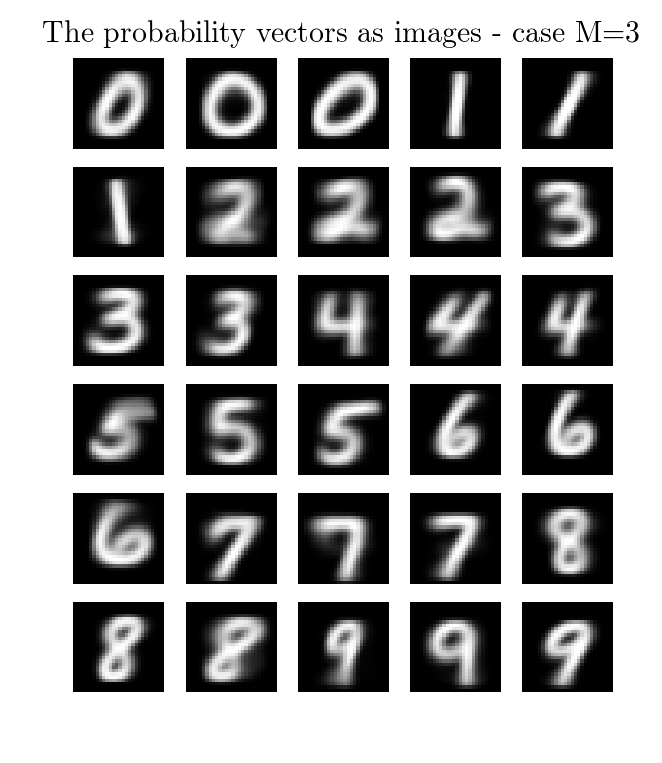

In [30]:
nrows = 6
ncols = 5

plt.figure(figsize=(ncols*0.7, nrows*0.7))

for i in xrange(nrows*ncols):
    if (i==3):
        plt.title("The probability vectors as images - case M=3")
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(p_params_M3[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

We see that we have 30 clusters here - 3 clusters per digit. It is clear that the grouping is better in different "types" of digit clusters, compared to the "mean" case of $M=1$.

Next thing to do: 

#### Classification (in case M=3).

In [32]:
# Function that, for a data vector x, calculates the likelihood of each class and assigns
# it to the class with the maximum likelihood

def ML_return_M3(x):
    """
    Returns the class with the maximum likelihood
    
    Input: Vector x
    Output : Class (0-9)
    """
    
    # Initilize the log-likelihoods of the ten categories
    Like = np.zeros(30)
    
    for i in range(30):
        log_p = np.log(p_params_M3[i]+1e-30)
        log_p_1 = np.log(1 - p_params_M3[i])
        
        Like[i] = np.sum(x*log_p + (1.0-x)*log_p_1)
        
    #Calculate maxlimum likelihood
    ML = np.max(Like)
    
    # Class - > where is the ML
    class_is = float(np.where(Like==ML)[0])
    
    # Now this "class_is" returns one of the 0,...,29
    # We want to convert it into one of the "physical" classes - numbers 
    # Between 0-9
    
    class_is = class_is//3.
    
    return class_is

In [33]:
Labels_predict_M3 = np.zeros(10000)

for i in range(10000):
    Labels_predict_M3[i] = ML_return_M3(data_test[i])

In [34]:
# Let's print the accuracy score
print(accuracy_score(labels_test[:,0],Labels_predict_M3))

0.8822


So, by having 3 classes per digit, we increased the accuracy from $\sim 84 \%$ to $\sim 88.2 \%$.

### Part 3: M=5

Repeat everything for M=5

In [42]:
# Initialize a matrix that contains the parameters p_m,j 
# For each of the classes 0, 1, ...., 9 and M = 5
p_params_M5 = np.zeros([50,784])

In [43]:
# Define a function that calculates the responsibilities w_mi
# Also return log - denominator

def w_mi_calc_5(p_j_par, gr_p_s, X):
    """
    Inputs:
    p_j_par: 3 x 84
    gr_p_s: 3 params
    X: data matrix n_input x 784
    
    returns: 3 x n matrix with the responsibilities
    """
    n = np.shape(X)[0]
    ell = np.zeros([5,n]) 
    w_mi = np.zeros([5,n])
    denom_i = np.zeros(n)
    for m in range(5):
        p_j_m = p_j_par[m]
        gr_p_m = gr_p_s[m]
        
        
        # Take the logs of the p_jm and gr_p
        log_gr_p_m = np.log(gr_p_m+1e-30)
        log_p_m = np.log(p_j_m+1e-30)
        log_p_1_m = np.log(1.0 - p_j_m)
        
        for i in range(n):
            x_vec = X[i]
            
            ell[m,i] = log_gr_p_m + np.sum(x_vec*log_p_m +(1.0 - x_vec)*log_p_1_m)
       
    
    for m in range(5):
        for i in range(n):
            L = np.max(ell[m,i])
            
            w_mi[m,i] = np.exp(ell[m,i] - L)/np.sum(np.exp(ell[:,i]-L))
            denom_i[i] = np.sum(np.exp(ell[:,i]))
    
    Log_L = np.sum(np.log(denom_i))
    return w_mi, Log_L    
   

In [44]:
for i in range(10): #In the range of the ten number classes
    # Work for each one of the classes 0, 1, ..., 9
    i_fl = float(i)
    #Select the data corresponding to the i-th class
    i_sel = (labels_train==i)[:,0]
    
    data_ith_class = data_train[i_sel] # Matrix of size n_ith x 784
    # length of the class 
    n_ith = np.shape(data_ith_class)[0]
    
    
    # =========================================================
    # =========================================================
    #Split that into three components
    # Create an array of length n_ith with entries 0,1,2,3,4
    rand_arr = np.random.randint(0,5,n_ith)
    
    # Split data into three categories at random 
    data_1 = data_ith_class[rand_arr==0]
    data_2 = data_ith_class[rand_arr==1]
    data_3 = data_ith_class[rand_arr==2]
    data_4 = data_ith_class[rand_arr==3]
    data_5 = data_ith_class[rand_arr==4]
    
    #Initialize now p_(1,2,3,4,5),j and greek_pi_1,2,3,4,5
    gr_pi = np.zeros(5)
    p_j_pars = np.zeros([5,784])
    
    # First greek_pi_1,2,3,4,5 (the mixtures of the three models)
    gr_pi[0] = np.shape(data_1)[0]/float(n_ith)   # Formula is N_m/N
    gr_pi[1] = np.shape(data_2)[0]/float(n_ith)
    gr_pi[2] = np.shape(data_3)[0]/float(n_ith)
    gr_pi[3] = np.shape(data_4)[0]/float(n_ith)
    gr_pi[4] = np.shape(data_5)[0]/float(n_ith)
    
    # Parameters p_js
    p_j_pars[0] = np.mean(data_1, axis=0)
    p_j_pars[1] = np.mean(data_2, axis=0)
    p_j_pars[2] = np.mean(data_3, axis=0)
    p_j_pars[3] = np.mean(data_4, axis=0)
    p_j_pars[4] = np.mean(data_5, axis=0)
   
    
    
    # =========================================================
    # =========================================================
    # Now iterate using the EM algorithm
    tol = 0.001 # Tolerance in the change of L
    L_old = 10 # Value to start with
    DL = 10.0 # Initial value, higher than the tolerance
    
    while (DL>tol):
        # Calculate responsibilities and Log_L
        # This is a 5 x (n_ith) matrix
        w_mi, L_new = w_mi_calc_5(p_j_pars, gr_pi, data_ith_class)
        
        # We have the responsibilities, let's update pi and p_j now
        # --------------------------------------------------------
        # First update mixtures
        gr_pi[0] = (np.sum(w_mi, axis=1)[0])/(n_ith)
        gr_pi[1] = (np.sum(w_mi, axis=1)[1])/(n_ith)
        gr_pi[2] = (np.sum(w_mi, axis=1)[2])/(n_ith)
        gr_pi[3] = (np.sum(w_mi, axis=1)[3])/(n_ith)
        gr_pi[4] = (np.sum(w_mi, axis=1)[4])/(n_ith)
        
        # Now update p_j_params
        # -------------------------------------------------------
        # Define matrix A
        A = np.matmul(w_mi, data_ith_class) # A has dimensions 3 \times 784
        
        norm = np.sum(w_mi, axis=1)
        
        # Update p_j_s
        p_j_pars[0,:] = (A[0,:])/(norm[0])
        p_j_pars[1,:] = (A[1,:])/(norm[1])
        p_j_pars[2,:] = (A[2,:])/(norm[2])
        p_j_pars[3,:] = (A[3,:])/(norm[3])
        p_j_pars[4,:] = (A[4,:])/(norm[4])
        
        
        
        # Calculate the (absolute) difference
        # of log likelihoods
        DL = np.abs(L_new-L_old)/L_old
        
        L_old = L_new
        
    
    # =================================================
    # =================================================
    # These are the final values 
    p_params_M5[5*i] = p_j_pars[0]
    p_params_M5[5*i+1] = p_j_pars[1]
    p_params_M5[5*i+2] = p_j_pars[2]
    p_params_M5[5*i+3] = p_j_pars[3]
    p_params_M5[5*i+4] = p_j_pars[4]
        
          

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: overflow encountered in exp


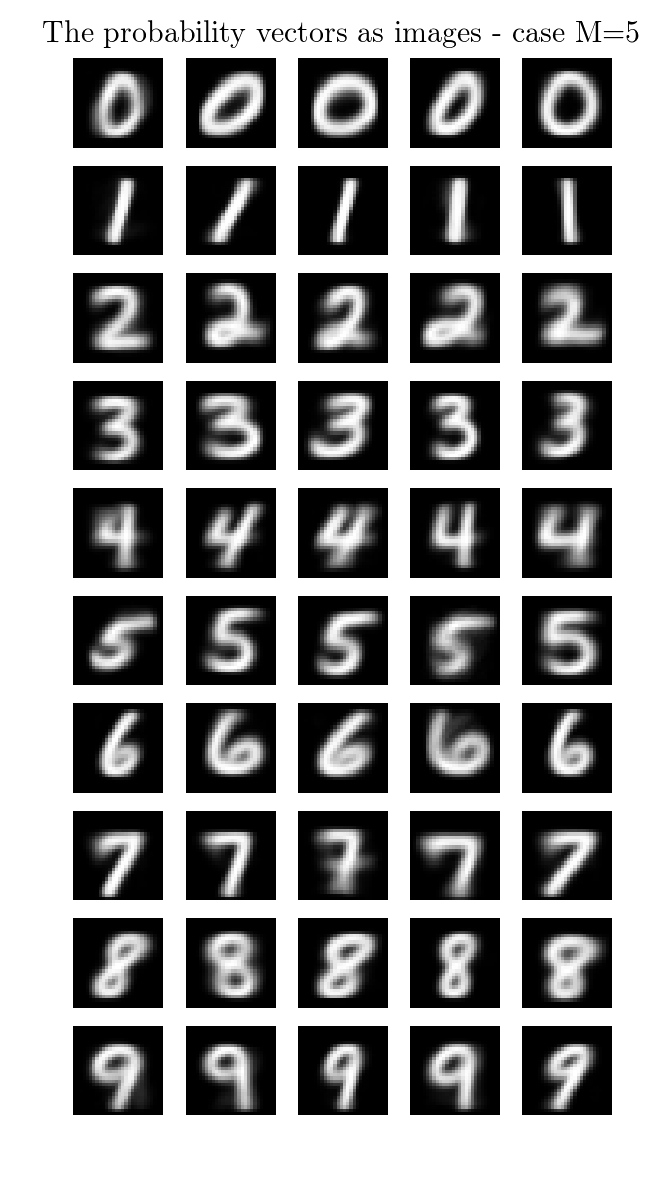

In [45]:
nrows = 10
ncols = 5

plt.figure(figsize=(ncols*0.7, nrows*0.7))

for i in xrange(nrows*ncols):
    if (i==3):
        plt.title("The probability vectors as images - case M=5")
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(p_params_M5[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.axis('off')
plt.show()

Let's use these classes for
####  classification

In [50]:
def ML_return_M5(x):
    """
    Returns the class with the maximum likelihood
    
    Input: Vector x
    Output : Class (0-9)
    """
    
    # Initilize the log-likelihoods of the ten categories
    Like = np.zeros(50)
    
    for i in range(50):
        log_p = np.log(p_params_M5[i]+1e-30)
        log_p_1 = np.log(1 - p_params_M5[i])
        
        Like[i] = np.sum(x*log_p + (1.0-x)*log_p_1)
        
    #Calculate maxlimum likelihood
    ML = np.max(Like)
    
    # Class - > where is the ML
    class_is = float(np.where(Like==ML)[0])
    
    # Now this "class_is" returns one of the 0,...,49
    # We want to convert it into one of the "physical" classes - numbers 
    # Between 0-9
    
    class_is = class_is//5.
    
    return class_is

In [51]:
Labels_predict_M5 = np.zeros(10000)

for i in range(10000):
    Labels_predict_M5[i] = ML_return_M5(data_test[i])

In [53]:
# Let's print the accuracy score
print(accuracy_score(labels_test[:,0],Labels_predict_M5))

0.8987


With 50 classes, we increased the accuracy to $\sim 90 \%$.